## Quadrotor

In [11]:
using TrajectoryOptimization
using Plots, LinearAlgebra

Import the quadrotor model

In [12]:
model = Dynamics.quadrotor
model_d = rk3(model) # discrete dynamics
n = model.n # number of states
m = model.m; # number of controls

Define numerical type

In [13]:
T = Float64;

Define initial and goals states

In [14]:
q0 = [1.;0.;0.;0.] # unit quaternion

x0 = zeros(T,n)
x0[1:3] = [0.; 0.; 0.]
x0[4:7] = q0

xf = zero(x0)
xf[1:3] = [0.;50.;0.]
xf[4:7] = q0;

Define a cost function, e.g., quadratic

In [15]:
Q = (1.0e-2)*Diagonal(I,n)
R = (1.0e-2)*Diagonal(I,m)
Qf = 1000.0*Diagonal(I,n);

Define a problem

In [16]:
N = 101 # number of knot points
dt = 0.1 # total time

U = [0.5*9.81/4.0*ones(m) for k = 1:N-1] # initial hovering control trajectory
obj = LQRObjective(Q,R,Qf,xf,N) # objective with same stagewise costs

prob = Problem(model_d,obj, x0=x0, N=N, dt=dt, xf=xf)
initial_controls!(prob,U); # initialize problem with controls

Solve problem

In [20]:
solve!(prob, iLQRSolverOptions{T}(verbose=true)); # solve with iLQR

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     18.17292526   0.00004203  0.56113   0.25      0e+00     2.36e-05  0.00085  0          


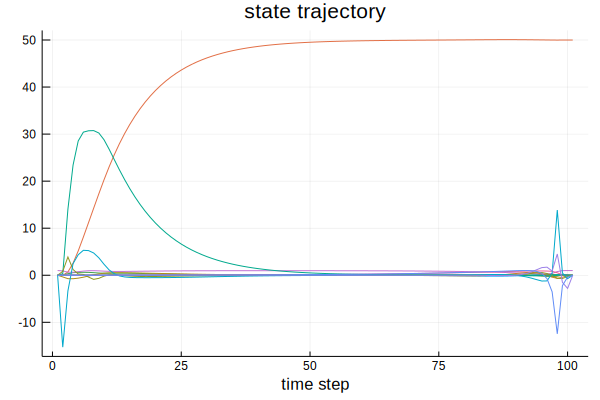

In [21]:
plot(prob.X,xlabel="time step",legend=:none,title="state trajectory")

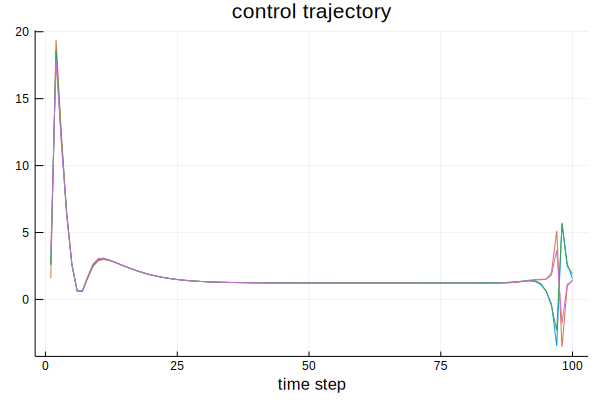

In [22]:
plot(prob.U,xlabel="time step",legend=:none,title="control trajectory")